# Introduction

Welcome to the eighth lab. Today we have _way too many_ topics to cover to do everything by hand as usual, so I selected different depths to each topic to make sure you gain full insight and applicable experience.

As you go through the exercise and you apply algorithm after algorithm, method after method, I want you to think about the actual **competence** you are accumulating over the months, both theoretical and applied. Think about it, and be confident: covering so many, so different algorithms in a single lab may sound like a challenge to the version of Past You from barely two months ago, but I believe Today's You is capable of taking on this whale of a lab and have space for more.

Working with many algorithms gives me another chance to shake you out of your confidence zone with respect to _data processing_ . Basically each algorithm requires different formats, so you cannot just define the data on top and keep reusing it: you will need to re-load the dataset for each exercise, applying a different processing each time.
Be flexible, and don't forget your train-test splits (and their correct usage) -- I should not need to mention it anymore, right? :)

Good luck, have fun!

# 1. Fundamentals

#### 1.1 **[1pt]** Write an example (in English) of a Machine Learning application for which the Supervised Learning paradigm is not (directly) applicable.

**A recommendation system on e-commerce website** : The algorithm that detects a group of customers that used to buy similar product and have similar preference. Grouping these customers will be helpful for the business to manage data in a better way. For SL, we need the correct output for every input, but for product recommendation, there could be multiple options that's equally worth. Furthermore, building the most prefered item for a single customer is unfeasible, while aggregating information from multiple customers means inconsistencies in the customer characteristics, age, education, decision process..

#### 1.2 **[1pt]** Write an example (in English) of a Machine Learning application for which the Unsupervised Learning paradigm is an ideal choice.

**Image Segmentation**: by finding groups of pixels in an image with (i) similar colors and (ii) within a minimal distance from each other, it is possible to extract shapes and build masks. These approaches still today can offer better performance than Deep Learning in cases where the training data is scarce and the colors/shapes are obvious

# 2. Clustering

#### 2.1 **[2pt]** Explain the $k$-means algorithm using a few words of your own. Particularly, state any requirements, and what the user needs to define.

- To use "your own words", a trick is to read the slide, decide which things you need to mention, then close the slide and imagine a friend with only basic technical background in front of you (aka "rubberducking", Google it!). Now tell this person the things that you decided to mention.
- No need to go crazy. This is a type of (vague!) question that you will need to answer over and over, typically to convince your boss to let you use a particular method, or to guide someone with less knowledge in the field. It's not a right/wrong question: you need to show that you have competence, list the key points, be brief and to the point.
- And of course, copy+paste+change words from the slide will score you 0 points :) while a sincere, fair try that is not wrong will pass, so no worries.

**K-means clustering** is an Unsupervised Learning method in which we split the data and grouped datapoints that are similar in a cluster. k here is a hyperparameter represented the number of clusters in the data. The similarity of a point is measured by the distance between them and the centroid of cluster (their average).

The points will be iteratively updated to represent the data and the algorithm is as an multiobjective optimzation of which total distance between the centroids are maximized and distance among datapoints within the cluster is minimized.

To run the algorithm, we need to define `number of cluster` and `similarity measure` used (i.e Euclidean, Mahattan distance..)

---------------------

For the next question, we need to understand how to evaluate a clustering algorithm. The main difference between clustering and classification is that, well, it's UL not SL: the labels are not involved in the training, and they should not be involved in the testing. So how do you test the performance of a clustering algorithm?

Each mean/cluster gets a numerical identifier, the only problem is that the number does not correspond to our labels because it's assigned randomly based on initialization. The most naïve way then is to **brute-force all mappings between the labels and the cluster numbers**: the one that makes the most sense is the one that should be used for evaluation. Since this is orthogonal to the lecture and may take a long time to debug, here is a snippet of code that does that.

Read it, understand it, play with it, and possibly improve it. Bruteforcing is rarely optimal, which is the very reason why ML exists :)  
(note: it may be easier to understand it if you first go ahead with answering the next question first, then come back to this)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
sns.set(rc={'figure.figsize':(8,6)}, style="whitegrid")

/Users/kimanh/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# Goal: convert the labels to the cluster numbers generated by k-means
import itertools
species_names = sns.load_dataset('iris').species.unique()
print(species_names)
possible_codes = itertools.permutations(range(len(species_names)))
print(possible_codes)
converters = [dict(zip(species_names, perm)) for perm in possible_codes]
print(converters)   #there're 3! ways of permutations
# try printing each of these variables and understand what they do

def cluster_to_class(model, fn_that_counts_misclassified, x_test, y_test):
    min_score = np.Infinity # we saw how to write a minimizer already right?
    right_conversion = None
    #for each set of converter, replace values of 'species' by the converter
    #then finding the best converter (right_conversion) which is minimizing misclassified
    for converter in converters:    
        conv_y_test = y_test.replace(converter) # conveniently works with `dict`s
        misclassified = fn_that_counts_misclassified(model, x_test, conv_y_test)
        if misclassified < min_score:
            min_score = misclassified
            right_conversion = converter
    return right_conversion

## to use this function, you will need something like this
# right_conversion = cluster_to_class(k_means_model, my_misclass_fn, x_test, y_test)
# conv_y_test = y_test.replace(right_conversion)
# k_means_misclassified = my_misclass_fn(k_means_model, x_test, conv_y_test)

['setosa' 'versicolor' 'virginica']
[{'setosa': 0, 'versicolor': 1, 'virginica': 2}, {'setosa': 0, 'versicolor': 2, 'virginica': 1}, {'setosa': 1, 'versicolor': 0, 'virginica': 2}, {'setosa': 1, 'versicolor': 2, 'virginica': 0}, {'setosa': 2, 'versicolor': 0, 'virginica': 1}, {'setosa': 2, 'versicolor': 1, 'virginica': 0}]


#### 2.2 **[3pt]** Apply the scikit-learn implementation of the $k$-means algorithm to the Iris dataset (4 features, but drop the labels for training), and print a performance score of your choice.

- Of course you want to pass $k=3$.
- Passing the trained `KMeans` object to `print()` shows several useful parameters and their default values.
- After you get it to work though, why don't you try $k=2$ or $k=4$ and see what happens when you have to _guess_ $k$ (which is the normal case in real applications).
- For the performance score, remember this is [clustering, not classification](https://stackoverflow.com/a/48617825/6392246), which means `score()` will ignore the labels and print "strange numbers". No worries, you know how to make your own scoring from the past labs, right?
- Notice how $k$-means is _very_ sensitive to initialization. To get a consistently better result you may want to explore options `max_iter`, `n_jobs` and of course `init`.

In [3]:
# Load dataset
iris = sns.load_dataset('iris')

# Train-test splitting
train, test = train_test_split(iris, test_size=0.2) #80-20 split

In [4]:
from sklearn.cluster import KMeans

x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1] #REMEMBER CLUSTERING DOES NOT LEARN WHICH CLASS HAS WHICH LABEL (just clustering based on updating the centroids)
#Therefore, training labels here are trivial!

x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]  #this is used to see how well we do clustering without training labels

print(y_test)

#Pass k=3:
k= 3
k_means = KMeans(n_clusters= k, max_iter= 10000).fit(x_train)
print(k_means.score(x_train, y_train))
print(k_means.score(x_test, y_test))
#plot_confusion_matrix(k_means, x_test, y_test)

123     virginica
121     virginica
70     versicolor
57     versicolor
130     virginica
104     virginica
77     versicolor
80     versicolor
40         setosa
93     versicolor
140     virginica
83     versicolor
25         setosa
32         setosa
7          setosa
2          setosa
131     virginica
102     virginica
84     versicolor
19         setosa
113     virginica
143     virginica
129     virginica
51     versicolor
56     versicolor
100     virginica
114     virginica
111     virginica
50     versicolor
126     virginica
Name: species, dtype: object
-58.76576298701298
-20.395572459872373


This is clustering, not classifier. No labels. No colors. Thus, `score()` also ignore the labels and printed strange numbers. And `confusion matrix` also only support classifers. We instead can **make our own score based on number of misclassified/total number:**

In [5]:
#Function calculating the score based on misclassified:
def my_score(model, x_test, y_test):
    y_preds = model.predict(x_test)
    misclassified = (y_preds != y_test).sum()
    return misclassified
    
right_conversion = cluster_to_class(k_means, my_score, x_test, y_test)
print(right_conversion) #this is the best converter

conv_y_test = y_test.replace(right_conversion)  #converted y_test
print(conv_y_test)

k_means_misclassified = my_score(k_means, x_test, conv_y_test)
print(f"K_means_misclassified: {k_means_misclassified}/{len(y_test)} point")

{'setosa': 0, 'versicolor': 1, 'virginica': 2}
123    2
121    2
70     1
57     1
130    2
104    2
77     1
80     1
40     0
93     1
140    2
83     1
25     0
32     0
7      0
2      0
131    2
102    2
84     1
19     0
113    2
143    2
129    2
51     1
56     1
100    2
114    2
111    2
50     1
126    2
Name: species, dtype: int64
K_means_misclassified: 6/30 point


#### 2.3 **[1pt]** Plot the centroids learned with $k$-means on top of the data.

- To get the centroids coordinates, access attribute `cluster_centers_` of the KMeans object. Here are some options I passed to `scatterplot` for visibility (remember you can use the [double-splat](https://stackoverflow.com/questions/36901/what-does-double-star-asterisk-and-star-asterisk-do-for-parameters) to transform the dict into keyword parameters):
```python
kwargs = {'marker':'X', 'color':'r', 's':200, 'label':'centroids'}
```
- The question does not specify the details of what to plot, so it's up to you to provide a correct and useful interpretation. You learned how to make useful plots, just be confident.
- The simplest is of course to reproduce what we saw so far: one plot, `petal_width` vs. `petal_length`. As they are the last two features, make sure to pick the corresponding coordinates from the centroids. Remember your ranges and your `transpose()` ;) 
- Even fancier: why not converting it to a DataFrame? Remember to drop the `species` column when constructing the `df`, as the centroids (learned with UL) have no species information (and thus one less column than iris): `columns=iris.columns.drop('species')`
- After answering correctly, if you want to learn something useful and fancy, try plotting a [[PairGrid]](https://seaborn.pydata.org/generated/seaborn.PairGrid.html) that mimics a PairPlot but with added clusters off-diagonal. If you want the usual distributions on the diagonal, it is time to learn it is done with _Density Estimation_ (which is what you learned to do for Gaussians in NB), automated in Seaborn with `kdeplot()`.

[[5.00681818 3.41818182 1.46363636 0.25      ]
 [5.91458333 2.73125    4.35416667 1.38333333]
 [6.83214286 3.06785714 5.72857143 2.075     ]]
   sepal_length  sepal_width  petal_length  petal_width
0      5.006818     3.418182      1.463636     0.250000
1      5.914583     2.731250      4.354167     1.383333
2      6.832143     3.067857      5.728571     2.075000


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

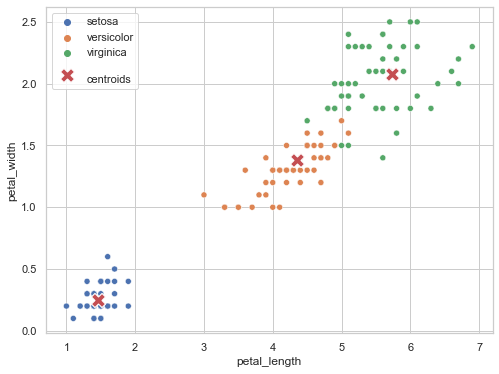

In [6]:
sns.scatterplot(data= iris, x= 'petal_length', y= 'petal_width', hue= 'species')
centroids = k_means.cluster_centers_
print(centroids)  #3 centroids corresponding to 3 clusters of dimension 4

opts = {'marker':'X', 'color':'r', 's':200, 'label': '\ncentroids'}

#we take the last 2 columns of centroids indicating 2 coordinates: petal_length and petal_width
#and then transpose() to plot
#centroid_x, centroid_y = centroids[:,2:].transpose()
#sns.scatterplot(x= centroid_x, y= centroid_y, **opts) #d-splat transforms dict into keyword parameters

#Alternatively: converting into DataFrame:

centroids = pd.DataFrame(centroids, columns= iris.columns.drop('species')) #naming columns with features excluding 'species'
print(centroids)
sns.scatterplot(data= centroids, x='petal_length', y= 'petal_width', **opts)

Note: this is a very basic application: while a decent knowledge of $k$-means can typically be useful in itself, the focus here is to cements your understanding of clustering, centroid, expectation maximization, and the difference between clustering and classification. For further reading, I strongly suggest you have a look at [[this very complete tutorial]](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a).

#### 2.4 **[2pt]** Train a scikit-learn OneClassSVM on the _versicolor_ class of the Iris dataset, and print the number of missed outliers.

- Careful with the input: you need to train this SVM only on the subset of the train data where the species is `versicolor`. That's "one-class". The training should not have access to data from the other two species.
- Also remember to drop the species column (as always) after selecting the lines with `versicolor`.
- The test inputs should work as expected, but the test labels should be converted so that `versicolor` is `1` and the others are `-1` (because those are the model outputs for "normal" and "outlier").
- Again, to compute the missed outliers, you cannot use `score()` or `plot_confusion_matrix()` because technically it's not a classifier. But you already made a function of the scoring code for the previous question right?

In [7]:
from sklearn.svm import OneClassSVM
iris = sns.load_dataset('iris')

train, test = train_test_split(iris, test_size= 0.2) #80-20 split

OC_x_train = train[train['species']=='versicolor'].drop('species', axis= 1)
#OC_x_train

#Convert the test label to 1, the others to -1
OC_y_test = np.array([1 if label =='versicolor' else -1 for label in y_test])

OC_model_train = OneClassSVM().fit(OC_x_train)

OC_SVM_misclassified = my_score(OC_model_train, x_test, OC_y_test)

print(f"OC_SVM_misclassified: {OC_SVM_misclassified}/{len(OC_y_test)} point")

OC_SVM_misclassified: 10/30 point


# 3. Compression and encoding

There are too many topics to cover for this lab. Having to choose one to cut off from practice, I had to objectively decide to remove my favorite one: compression and encoding. The reason is that in most jobs experience in the others will be more useful, while you will still see plenty of encoding techniques over the course. And the concept of dictionary building is related to $k$-means and feature extraction anyway.

On the other hand, understanding dictionaries as features, and encodings as mappings, allows for a much deeper competence and broader flexibility in the field than being stuck to only the "big guns" of Deep Learning for this task.

So my gift to you is one of my favorite papers so far: "The Importance of Encoding Versus Training with Sparse Coding and Vector Quantization", from A. Coates and A. Ng [[link]](http://ai.stanford.edu/~acoates/papers/coatesng_icml_2011.pdf).

If you want to learn the state of the art, in any scientific field, you need to learn to read papers. A good suggestion not to be overwhelmed, especially at the beginning while building knowledge and glossary, is to read it this way

- First the abstract
- Then think about it and read the abstract again
- Now read the introduction, but don't fret about terms you don't understand, it's normal
- Next read the conclusion, and make sure their claims make sense with what you read so far
- The "discussion" explains how they interpreted their results and built the conclusion, which could be invaluable to understand their claims
- If you want more detail on the "how", check out the "method" section (here called "learning framework")
- The "related work" (sometimes "literature review") gives you pointers to extend your study on the field and applications
- Do not overlook "experimental results", as it will give you the means to reproduce their results. And yes, chances are your thesis (especially if Master) will begin by asking you to reproduce a paper's result. Repeatability and verification (the hypothesis needs to be falsifiable) are at the very core of the scientific process.

So: go at least through abstract, introduction and conclusions, and then answer the following question:

#### 3.1 **[4pt]** In the conclusion of the paper "The Importance of Encoding Versus Training with Sparse Coding and Vector Quantization", which part do the authors find more effective, the encoding (i.e. decision-mappings) or the dictionary training (i.e. feature extraction)? Reflect on the consequences on modeling, and express your opinion on Feature Extraction and Decision Mappings.

The solution will contain no "right" answer, just **my** answer. It actually constitutes one the foundations of my research. Full points will be awarded to anyone (i) asserting their opinion, and (ii) justifying it with findings from the paper.

The authors find the **encoding** much more significant than the **dictionary training**, to the point that sophisticated encodings can produce useful codes based on features generated from the data via random process.

This implies that there's more strength to be found in **function compostion** than in careful **data preparation**, and that the last **decision mappings** is incomparably more important than the initial **feature extraction**.

When tackling a problem with Machine Learning:

(i) do enough data cleaning to make algorithms work
(ii) do (possibly several layers of) feature extraction (training) to increase the abstraction level, then
(iii) very carefully prepare a final decision mapping (encoding) for the best performance.

This pattern is always inherent, often unaware and sometimes ignored in all the most successful ML applications to date.

# 4. Matrix decomposition

#### 4.1 **[1pt]** For this data imputation exercise, use the entire Iris dataset (no split in train/test, but do drop `species`). Select the value in row index 110 column index 1, and store it in an outside variable. Then delete it from the dataset.

- To delete a value from a dataset, simply assign the `not a number` value `np.nan` to the corresponding element.
- Have you tried using `drop()` to remove a column? Remember that the default axis is the rows, so you need to pass `axis=1` or `axis='columns'` to drop a column by name.
- You can print a few rows around your target to verify everything is going as you expect.

In [8]:
iris2 = sns.load_dataset('iris').drop('species', axis= 1)
nrow, ncol = (110, 1)
trg = iris2.iloc[nrow, ncol]
print(f"Target is: {trg}")
iris2.iloc[108:113]

#Delete trg from the dataset, assign `not a number` value np.nan:
iris2.iloc[nrow, ncol] = np.nan
iris2.iloc[108:113]

Target is: 3.2


,sepal_length,sepal_width,petal_length,petal_width
108,6.7,2.5,5.8,1.8
109,7.2,3.6,6.1,2.5
110,6.5,NaN,5.1,2.0
111,6.4,2.7,5.3,1.9
112,6.8,3.0,5.5,2.1


#### 4.2 **[4pt]** Reconstruct (impute) the missing value using SVD and dimensionality reduction-based denoising. Do not use scikit-learn. Use the SVD method from `np.linalg`. Print the (absolute) difference between the original and reconstructed values.

- Ok, relax, this is not your first complex question. As usual, deconstruct the process in smaller, achievable goals, then work through them step by step.
- The first thing you need to do is to get rid of is the "hole" in the data, because SVD will not work with `nan` values. Simply patch it with an average of the values above and below in the same feature. We know this is not ideal, but no worries. BTW congratulations with this you just learned the foundation of the **$k$-nearest-neighbors algorithm (KNN)**.

In [19]:
#patch the missing value with an average of the values above and below in the same feature:
first_estimate = round(np.mean([iris2.iloc[nrow-1,ncol], iris2.iloc[nrow+1,ncol]]), 2)
iris2.iloc[nrow, ncol] = first_estimate
print(f"Target is: {trg} \nInitial estimate is: {first_estimate}")
print(iris2.iloc[nrow, ncol])

Target is: 3.2 
Initial estimate is: 3.15
3.15


- Now decompose the entire dataframe('s data matrix) using the SVD implementation in numpy's `linalg` module. Read carefully the documentation: it does not return `u`, $\Sigma$ and `v` as expected from the lecture! Instead you get `v` as expected $n \times n$; `s` a vector of size $n$ containing the $\sigma$ eigenvalues (the diagonal of $\Sigma$, remember?); and `vh` $m \times m$ is the transposition of `v` -- saves a transpose, but remember you will need to zero a _row_ not a _column_.
- Next you want to drop the least contributing eigenvector. Find the smallest non-zero eigenvalue, and set to zero the corresponding column in `u` and row in `vh`. The relative size also tells you how much precision will you be losing with this reduction.
- Now you can already reconstruct the data. Remember the order of the dot products matters. Also, you need to build your $\Sigma$. There's an example in the documentation of SVD. Importantly: $\Sigma$ is rectangular, the eigenvalues go in the diagonal of the first "square" of this matrix, the rest is zeros. You can set a range of rows and columns of a numpy rectangular matrix to (the values of) a diagonal matrix created with `np.diag()`, just match the sizes.
- Fetch the value in the target element's position in the reconstruction matrix. Has it changed w.r.t. its initial estimate? Print the difference with the original and technically you're done.
- If you are unsatisfied with the result though, you can run the cycle a few times. Place the code written so far in a function, so you can iterate multiple calls. Remember that you need to insert the new value in the _original matrix_ , and then loop all your calls to the denoising function on this matrix. Looping on the reconstruction is a common error which may cost you a lot! With every denoising you are losing a bit of information; copying only the value you are denoising reintegrates the information in the rest of the matrix, allowing for a much more accurate result.
- I converge (i.e. no more significant changes) to within 0.07 of the correct value in 50 iterations. I also simply save the errors (abs diff) at every iteration, then do the usual `lineplot`. Nothing new, but these sanity checks are priceless when working with ML.
- Alternatively: what happens if you drop two columns instead of one?

Estimate 10: 3.4182831574216856
Estimate 20: 3.5308267760835474
Estimate 30: 3.5716650118983093
Estimate 40: 3.5866518037421073
Estimate 50: 3.5921768453558625

 Imputation/reconstruction error: 0.39


,sepal_length,sepal_width,petal_length,petal_width
108,6.7,2.500000,5.8,1.8
109,7.2,3.600000,6.1,2.5
110,6.5,3.592177,5.1,2.0
111,6.4,2.700000,5.3,1.9
112,6.8,3.000000,5.5,2.1


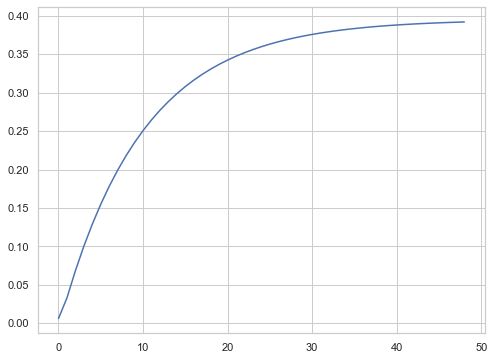

In [14]:
#Decompose the data matrix:

def denoise(mat):
    o_nrows, o_ncols = mat.shape
    u, s, vh = np.linalg.svd(mat, full_matrices= True)
    
    #Drop least contributing eigenvectors:
    u[:,-1] = 0     #zero last column of u
    s[-1] = 0       #not necessary, but consistency
    vh[-1,:] = 0    #zero last row of vh (last column of v)
    
    #We need to reconstruct the data to the orignal dimensionality
    sigma = np.zeros((o_nrows, o_ncols), dtype = s.dtype)   #create mxn sigma matrix of 0 elements
    sigma[:o_ncols, :o_ncols] = np.diag(s)    #populate sigma with nxn diagonal matrix
    rec_mat = pd.DataFrame(np.dot(u, np.dot(sigma, vh)))   #reconstructed matrix
    return rec_mat


#Fetch the value in the target element's position in the reconstruction matrix

errors = []
for nstep in range (50-1): #range from 0 to 48
    rec = denoise(iris2).iloc[nrow, ncol]
    errors.append(abs(trg-rec))  #initial estimate is the average above
    if (nstep+2)%10 ==0: 
        print (f"Estimate {nstep+2}: {rec}")
    iris2.iloc[nrow, ncol] = rec
print(f"\n Imputation/reconstruction error: {round(abs(trg-rec), 2)}")

#You may see a concave in the error: remember this is UL, thus BLIND! This is not a LOSS!

sns.lineplot(x= range(len(errors)), y= errors)
iris2.iloc[108:113]

#### 4.3 **[3pt]** Plot the entire Iris dataset (no split, keep the classes) projected into 2 dimensions using PCA. Use scikit-learn to compute the principal components.

- Yes, you need to reproduce the same picture as in the slides :)
- You need a fresh copy of the Iris dataset, then `sklearn` requires the labels to be numeric. Do you remember the `astype('category').cat.codes` trick?
- Check the documentation of PCA. You need to set the `n_components` parameter.
- Projecting data on the principal components is much, much easier by using the `transform()` function.
- For a neat one-line plot with Seaborn, convert the projected data back to a DataFrame and name the columns! Then add back the `species` column so you can use `hue` ;) and use a nice palette!

          PC1       PC2     species
0   -2.865415  0.296295      setosa
20  -2.516995  0.405236      setosa
40  -2.945219  0.230261      setosa
60  -0.470386 -1.265860  versicolor
80  -0.061676 -0.683733  versicolor
100  2.723151 -0.033898   virginica
120  2.624107  0.353673   virginica
140  2.518935  0.150312   virginica


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

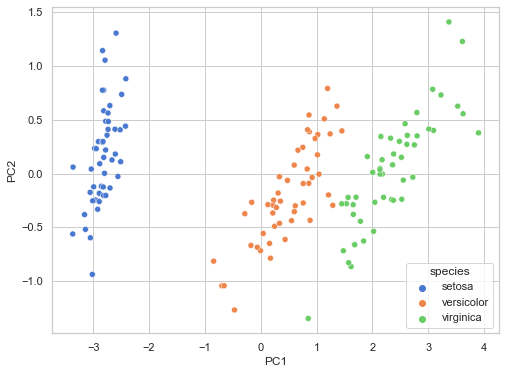

In [18]:
from sklearn.decomposition import PCA
iris = sns.load_dataset('iris')

#Convert species to numerical values
orig_species = iris['species']
iris['species'] = iris['species'].astype('category').cat.codes

#Train on the dataset, keep only 2 principal component
pca = PCA(n_components=2).fit(iris)

#Projecting the dataset to these 2 components (naming columns optional but neat)
iris_2D = pd.DataFrame(pca.transform(iris), columns= ['PC1', 'PC2'])
#put the labels back for readability
iris_2D['species'] = orig_species
print(iris_2D.iloc[::20]) #Step range parameters, print all elements jumping every 20 steps

#Plot iris_2D
sns.scatterplot(data= iris_2D, x='PC1', y= 'PC2', hue= 'species', palette = 'muted')

#### 4.4 **[2pt]** Explain (in English) the relationship between (classic) recommender systems and denoising. Then go one step further: to understand the current state of the art (not covered in the lecture), explain a recommender system in term of _mapping_.

- Modern recommender systems rarely use matrix decomposition approaches. Better results have been obtained modeling the mapping directly with flexible, generic function approximators with high generalization capabilities such as neural networks.

**Data imputation** corresponds to denoising an initial estimate of a missing value. Recommender systems impute user preferences (which have not been stated before) based on available preferences (of the same user on other items, and of other users on the target item).

**Recommender systems** thus map the inherent characteristics of users and items into predicting missing preferences. This can be seen as a multi-step approach: the user's features can be extracted by the preferences stated on other items, while the item's features can be extracted by the preferences stated on it by other users. A second step can then map these two informative features into a final **regression of the target preference**( of target user on target item).
This can ofc be trained in a supervised learning fashion, by predicting the ratings actually present in the dataset, and computing a Loss over each prediction.

# At the end of the exercise

#### BONUS **[ZERO pt]** Clustering is the core of UL. Master $k$-means with this [[tutorial]](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a).

#### BONUS **[ZERO pt]** Curious about implementing SVD in Python? It's not hard, here's a good tutorial: [[link]](https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/).

#### BONUS **[ZERO pt]** Over the years, I found that whipping out a quick PCA often makes visual analysis of complex data much clearer and with minimal investment. Follow [this tutorial](http://bebi103.caltech.edu.s3-website-us-east-1.amazonaws.com/2015/tutorials/r5_pca.html) to get some experience at it. Challenge: no copy+paste allowed, type everything: muscle memory is much more effective at retaining experience than passive study. Particularly useful is the discussion at the end: learn that Dimensionality Reduction _hides_ information!! It is extremely dangerous to found your decisions on a PCA plot on a subset of axis (e.g. 2), people have lost entire careers on that! As always, each tools has its own utility and drawbacks, and you need to learn the consequences BEFORE you blindly call a library someone else wrote and bet your whole career on its output. :)

#### BONUS **[ZERO pt]** Dictionary-based learning has tons of applications. This scikit-learn page contains a good explanation, reference to a library algorithm, an example, and even a link to the paper which published the algorithm [[link]](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.DictionaryLearning.html). I definitely suggest you have a good look at it.

#### BONUS **[ZERO pt]** Once you have a dictionary, you can learn about Sparse Coding here: [[link]](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparseCoder.html). If you want to see a cool application, Google for "super resolution": although some recent results use Neural Networks, early Sparse Coding results were used to detect congenital heart problems in newborns, where their hearts are too small for defects to be visible on normal MRI scans. *Enhance! (cit.)*

### Final considerations

- Supervised Learning implies the presence of a _supervisor_ in the data preparation, an expert *oracle* that provides the *correct* labels. This is typically either a human (which means limited data, human errors, time constraints, etc.), or (lately more common) another algorithm that is trusted to be exact (but have you ever heard of bug-free code?). In Deep Reinforcement Learning we will see that the reward function is learned through SL; in Self-Supervised Learning and in Embeddings applications it is typically an Unsupervised Learning algorithm to provide the oracle.
- All applications of UL stem from two concepts:
    - **Similarity**: similar things are put together, different things are separated.
    - **Information**: data contains redundancy and noise which can be mitigated by studying/extracting global patterns and references. What interests us is the underlying *information*, the true behavior of the underlying generating function.
- Unsupervised Learning is almost always present one way or another in complex applications, yet rarely recognized or credited for what it is -- it's always called something like "embedding", "pre-processing", "cleaning", "aggregation" etc. Plain "UL" is so old school that nobody wants to say they are doing it, basing their whole fancy Deep Learning models on its output. Learn to recognize when UL is applied, and the competence you gained today will find more applications than you imagine.